In [3]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import itertools as it
#import scipy.cluster.hierarchy as hierarchy
#import random
from infomap import Infomap
%matplotlib inline
from networkx.generators.community import LFR_benchmark_graph
from sklearn.metrics.cluster import normalized_mutual_info_score
#import copy
#import math   
import pandas as pd                  
import igraph as ig                
from igraph import*
from openpyxl import Workbook
#from numpy import random as nr 

#import time
#import eventlet

In [2]:
def network_community(community_list,G):    
    #将节点标号从1开始转化为从0开始
    community_list_new = []
    for i in range(len(community_list)):
        temp = []
        nodes = community_list[i]
        for j in nodes:
            node = int(j-1)
            temp.append(node)
        community_list_new.append(temp)
        
    ##将社区划分列表转变成membership
    membership = []
    for k in range(0,len(G)):
        membership.append(0)
       
    # 根据社团划分对membership赋值
    for l in range(0,len(community_list_new)):
        nodes = community_list_new[l]
        for m in nodes:
            membership[m] = l
    for s in range(len(membership)):
        membership[s] = membership[s]+1
        
    return membership

In [4]:
workbook = Workbook()
save_file = "/Users/yilingluo/Desktop/try.xlsx"
worksheet = workbook.active

In [5]:
w1 = workbook.create_sheet("fastgreedy") 
w2 = workbook.create_sheet("infomap")

In [17]:
nmifg = []
nmiinfomap = []
for i in range(2,17):
    n = 2500
    tau1 = 3
    tau2 = 1.5
    mu = i/20
    G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=50, max_community=200, tol=10**-4)
    print(mu)

    #nx.draw(G, with_labels=True)

    communitiesLFR = {frozenset(G.nodes[v]["community"]) for v in G}
    #print(communitiesLFR)

    lstLFR = [list(x) for x in communitiesLFR]
    #print(lstLFR)

    membershipLFR = network_community(lstLFR,G)

    from networkx.algorithms.community import greedy_modularity_communities
    communitiesFG = greedy_modularity_communities(G, weight=None, resolution=1, n_communities=1)

    lstFG = [list(x) for x in communitiesFG]

    membershipFG = network_community(lstFG,G)

    origin_edges = nx.to_edgelist(G)
    new_list = []
    for edge_i in range(0,len(origin_edges)):
        node_dict = list(origin_edges)[edge_i]
        new_list.append([node_dict[0],node_dict[1]])

    g = Graph(new_list)  
    h1 = g.community_infomap()
    community_list_new = list(h1)

    list(community_list_new).remove(community_list_new[0])  

    membershipINFOMAP = network_community(community_list_new,G)
    #print(normalized_mutual_info_score(membershipFG,membershipLFR ))
    print(compare_communities(membershipFG, membershipLFR, method='nmi', remove_none=False))
    nmifg.append(compare_communities(membershipFG, membershipLFR, method='nmi', remove_none=False))
    nmiinfomap.append(compare_communities(membershipINFOMAP, membershipLFR, method='nmi', remove_none=False))
    #print(normalized_mutual_info_score(membershipINFOMAP,membershipLFR))

0.1


KeyboardInterrupt: 

In [6]:
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=20,seed=10)
#nx.draw(G, with_labels=True)

In [ ]:
communitiesLFR = {frozenset(G.nodes[v]["community"]) for v in G}
print(communitiesLFR)

lstLFR = [list(x) for x in communitiesLFR]
#print(lstLFR)

membershipLFR = network_community(lstLFR,G)
#print(membershipLFR)

In [10]:
from networkx.algorithms.community import greedy_modularity_communities
communitiesFG = greedy_modularity_communities(G, weight=None, resolution=1, n_communities=1)

lstFG = [list(x) for x in communitiesFG]

membershipFG = network_community(lstFG,G)

origin_edges = nx.to_edgelist(G)
new_list = []
for edge_i in range(0,len(origin_edges)):
    node_dict = list(origin_edges)[edge_i]
    new_list.append([node_dict[0],node_dict[1]])

g = Graph(new_list)  
h1 = g.community_infomap()
community_list_new = list(h1)

list(community_list_new).remove(community_list_new[0])  

membershipINFOMAP = network_community(community_list_new,G)
print(normalized_mutual_info_score(membershipINFOMAP,membershipFG))

0.9999999999999999


In [31]:
c = {frozenset(G.nodes[v]["community"]) for v in G}

In [32]:
from networkx.algorithms.community import greedy_modularity_communities 
c = greedy_modularity_communities(G, weight=None, resolution=1, n_communities=1)

In [33]:
partition_map = {}
for idx, cluster_nodes in enumerate(c):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{128: 0,
 130: 0,
 135: 0,
 9: 0,
 10: 0,
 139: 0,
 145: 0,
 148: 0,
 23: 0,
 151: 0,
 156: 0,
 30: 0,
 159: 0,
 160: 0,
 162: 0,
 163: 0,
 37: 0,
 166: 0,
 167: 0,
 42: 0,
 171: 0,
 173: 0,
 48: 0,
 177: 0,
 49: 0,
 179: 0,
 56: 0,
 185: 0,
 58: 0,
 187: 0,
 60: 0,
 66: 0,
 198: 0,
 71: 0,
 199: 0,
 73: 0,
 204: 0,
 205: 0,
 79: 0,
 80: 0,
 86: 0,
 217: 0,
 218: 0,
 92: 0,
 93: 0,
 94: 0,
 96: 0,
 97: 0,
 230: 0,
 103: 0,
 105: 0,
 236: 0,
 111: 0,
 241: 0,
 114: 0,
 115: 0,
 116: 0,
 119: 0,
 120: 0,
 123: 0,
 124: 0,
 126: 0,
 8: 1,
 147: 1,
 20: 1,
 28: 1,
 29: 1,
 31: 1,
 51: 1,
 52: 1,
 54: 1,
 61: 1,
 63: 1,
 64: 1,
 72: 1,
 203: 1,
 75: 1,
 76: 1,
 207: 1,
 209: 1,
 82: 1,
 210: 1,
 211: 1,
 83: 1,
 212: 1,
 215: 1,
 213: 1,
 88: 1,
 220: 1,
 225: 1,
 227: 1,
 228: 1,
 229: 1,
 101: 1,
 231: 1,
 233: 1,
 106: 1,
 234: 1,
 108: 1,
 240: 1,
 113: 1,
 242: 1,
 243: 1,
 117: 1,
 246: 1,
 249: 1,
 0: 2,
 4: 2,
 5: 2,
 137: 2,
 140: 2,
 141: 2,
 142: 2,
 149: 2,
 26: 2,
 154: 2,
 169

In [11]:
node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

NameError: name 'partition_map' is not defined

In [9]:
w1.append(nmifg)
w2.append(nmiinfomap)

In [10]:
workbook.save(filename=save_file)

In [37]:
nx.write_edgelist(G, "test.csv")

  Infomap ends at 2022-04-17 16:57:07
  (Elapsed time: 0.012s)
Parsing undirected network from file 'test.txt'... 
{0: 34, 73: 0, 4: 0, 100: 0, 86: 0, 54: 0, 229: 0, 3: 0, 39: 0, 55: 0, 67: 0, 78: 0, 134: 0, 152: 0, 181: 0, 215: 0, 10: 0, 28: 0, 68: 0, 122: 0, 58: 0, 79: 0, 142: 0, 164: 0, 169: 0, 197: 0, 230: 0, 44: 1, 9: 1, 63: 1, 228: 1, 24: 1, 22: 1, 167: 1, 189: 1, 171: 1, 224: 1, 236: 2, 91: 2, 36: 2, 35: 2, 69: 2, 84: 2, 211: 2, 8: 2, 127: 2, 184: 2, 125: 2, 176: 2, 206: 3, 2: 3, 199: 3, 1: 3, 108: 3, 34: 3, 143: 3, 221: 3, 52: 3, 57: 3, 43: 4, 121: 4, 192: 4, 76: 4, 26: 4, 153: 4, 172: 4, 179: 4, 204: 4, 64: 4, 66: 5, 239: 5, 246: 5, 145: 5, 16: 5, 190: 5, 193: 5, 205: 5, 218: 5, 93: 6, 15: 6, 32: 6, 7: 6, 95: 6, 237: 6, 158: 6, 185: 7, 212: 7, 170: 7, 77: 7, 94: 7, 99: 7, 202: 7, 132: 8, 105: 8, 157: 8, 196: 8, 6: 8, 81: 8, 188: 8, 249: 8, 90: 9, 17: 9, 27: 9, 62: 9, 191: 9, 233: 9, 11: 9, 207: 10, 201: 10, 41: 10, 219: 10, 71: 10, 146: 10, 166: 10, 175: 10, 83: 11, 124: 11, 1

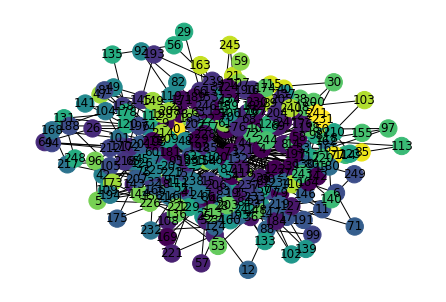

In [81]:
nx.write_edgelist(G, "test.txt")

imfb = Infomap("--clu --ftree")
imfb.read_file("test.txt")

imfb.run()

tree = imfb

communities = {}
#for node in tree.leafIter():
for node in tree.iterTree():
    #communities[node.originalLeafIndex] = node.moduleIndex()
    communities[node.physicalId] = node.moduleIndex()
nx.set_node_attributes(G, name='community', values=communities)
print(communities)

node_colors = [communities[n] for n in G.nodes]

nx.draw(G, node_color=node_colors, with_labels=True)

In [ ]:
#with eventlet.Timeout(1,False):
#    time.sleep(0.5)
#    print('aaa')
#print('bbb')

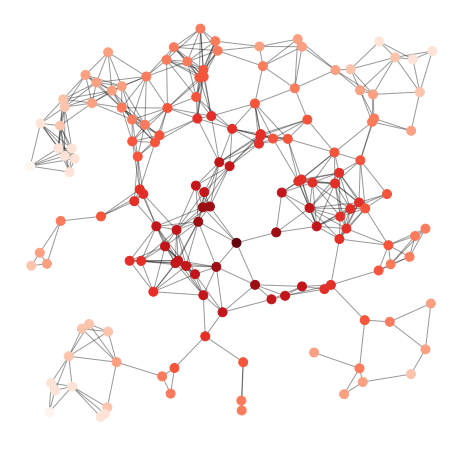

In [67]:
G = nx.random_geometric_graph(150, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")

plt.show()

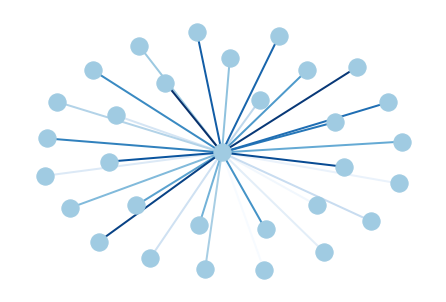

In [14]:
G = nx.star_graph(30)
pos = nx.spring_layout(G)  # 布局为中心放射状
colors = range(30)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors,width=2, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

In [1]:
pip install Pygement

ERROR: Could not find a version that satisfies the requirement Pygement (from versions: none)
ERROR: No matching distribution found for Pygement
Note: you may need to restart the kernel to use updated packages.
